# Notebook for experiment no. 212 - Viscosity


In [1]:
## using inline plots
%matplotlib inline

## importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from helper import printResult
import uncertainties as unc
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit

## 1) Stokes

In [14]:
### data
s = unc.ufloat(200, 2) #falling distance [mm]
R = 75/2 # cylinder radius [mm]

# timings
t_4c5mm =  np.mean(unp.uarray([5.84,5.84,5.89,5.9,5.89],.2)) # 
t_4mm =    np.mean(unp.uarray([7.5,7.45,7.59,7.2,7.4],.3)) #
t_3c5mm =  np.mean(unp.uarray([8.31,8.18,8.32,8.34,8.32],.3)) # radius 3.572mm
t_3mm =    np.mean(unp.uarray([11.07,10.93,11.1,11.07,11.07],.4))
t_2c5mm =  np.mean(unp.uarray([15.42,15.29,16.24,15.53,15.61],.4))
t_2mm =    np.mean(unp.uarray([23.5,23.65,23.53,23.76,22.95],.5))
t_1c5mm =  np.mean(unp.uarray([40.2,39.6,37.74,39.62,40.36],.5))
t_1mm =    np.mean(unp.uarray([4*18.64,4*20.9,4*20.07,4*21.61,4*19.81],.6))
t_0c75mm = np.mean(unp.uarray([4*33.02,4*33.01,4*30.93,4*32.8,4*32.45],.6))
t = np.array([t_4c5mm, t_4mm, t_3c5mm, t_3mm, t_2c5mm, t_2mm, t_1c5mm, t_1mm, t_0c75mm])

# radii
r = np.array([4.5, 4, 3.572, 3, 2.5, 2, 1.5, 1, 0.75]) 
r = unp.uarray(r, r*0.01) # 1% Fehler 

# density in g/cm^3
rho_k = unp.uarray([1.3625, 1.3575, 1.3775, 1.3775, 1.3775, 1.3775, 1.3775, 1.3775, 1.3925], 0.0025) *1e-3 # g/mm^3
rho_f = unc.ufloat(1.147, 0.0005) *1e-3 # see diagramm in script (at 22.5°C ) [g/mm^3]

In [15]:
### mean fall velocity
v = s/t

### ladenburg adjustment
lamb = 1 + 2.1*r/R

### values for plotting
x = unp.nominal_values(r)**2
x_err = unp.std_devs(r)**2
y = unp.nominal_values(v/(rho_k-rho_f))
y_err = unp.std_devs(v/(rho_k-rho_f))

### corrected values for plotting
y_corr = unp.nominal_values(v*lamb/(rho_k-rho_f))
y_err_corr = unp.std_devs(v*lamb/(rho_k-rho_f))

### linear fit
def lin_reg(x,k):
    return k*x

popt, pcov = curve_fit(lin_reg, x, y_corr, p0=[9000])
popt_err = np.sqrt(np.diag(pcov))
printResult('k', popt[0], popt_err[0],unit="m^2/(s\cdot kg)",decimal=1)

<IPython.core.display.Math object>

In [16]:
# parameter-string
par_str = r'$k=%s\pm %s\ \mathrm{[\frac{mm^2}{g \cdot s}]}$'%(round(popt[0],1),round(popt_err[0],1))

### dynamic viscosity eta
k = unc.ufloat(popt[0], popt_err[0]) # slope
eta = 2*9.81e3/(9*k)
printResult('\eta_{dyn} ', eta.n,eta.s, unit='mPa\cdot s')

<IPython.core.display.Math object>

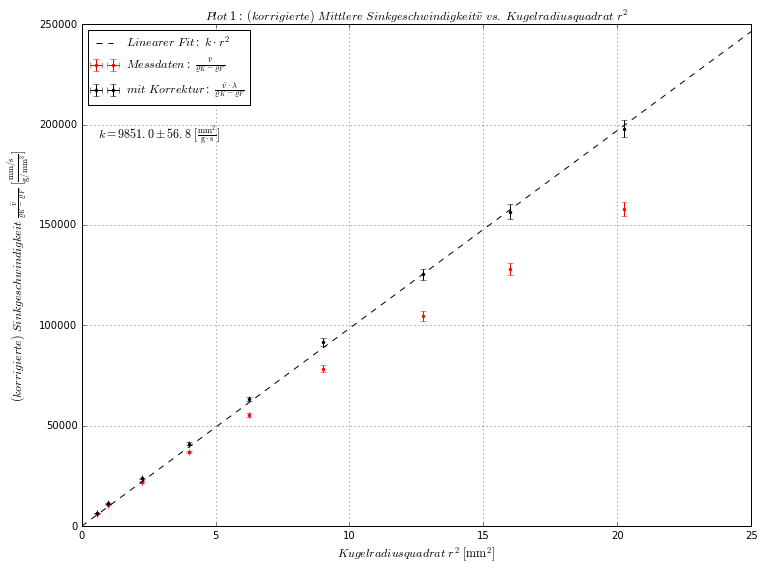

In [17]:
### plotting
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=y_err, xerr=x_err, fmt='r.', 
            label='$Messdaten:\ \\frac{\\bar{v}}{\\varrho_K - \\varrho_F}$')
ax.errorbar(x, y_corr, yerr=y_err_corr, xerr=x_err, fmt='k.', 
            label='$mit\ Korrektur:\ \\frac{\\bar{v}\cdot\\lambda}{\\varrho_K - \\varrho_F}$')
ax.plot(np.linspace(0,25), lin_reg(np.linspace(0,25), *popt), 'k--', 
        label='$Linearer\ Fit:\ k \cdot r^2$')
ax.text(0.6, 193000, par_str, fontsize=12)
ax.set_title('$Plot\ 1:\ (korrigierte)\ Mittlere\ Sinkgeschwindigkeit \\bar{v}\ vs.\ Kugelradiusquadrat\ r^2$',
             fontsize=12)
ax.set_xlabel('$Kugelradiusquadrat\ r^2\ \mathrm{[mm^2]}$', fontsize=12)
ax.set_ylabel('$(korrigierte)\ Sinkgeschwindigkeit\ \\frac{\\bar{v}}{\\varrho_K - \\varrho_F}\ \mathrm{[\\frac{mm/s}{g/mm^3}]}$',
              fontsize=12)
ax.grid()
ax.legend(fontsize=12, loc=0)
#plt.savefig('Plot1.pdf', dpi=400, format='pdf')
plt.show()

In [42]:
d = DataFrame(np.array([unp.uarray(x, x_err), v, unp.uarray(y, y_err)]).T, 
          columns=("$r^2$","$\\bar v$","$\\frac{\\bar{v}}{\\varrho_K - \\varrho_F}$"))
d


,$r^2$,$\bar v$,$\frac{\bar{v}}{\varrho_K - \varrho_F}$
0,20.2500+/-0.0020,34.1+/-0.6,(1.581+/-0.034)e+05
1,16.0000+/-0.0016,26.9+/-0.6,(1.279+/-0.031)e+05
2,12.7592+/-0.0013,24.1+/-0.5,(1.046+/-0.023)e+05
3,9.0000+/-0.0009,18.10+/-0.34,(7.85+/-0.17)e+04
4,6.2500+/-0.0006,12.81+/-0.19,(5.56+/-0.10)e+04
5,4.0000+/-0.0004,8.52+/-0.12,(3.70+/-0.07)e+04
6,2.25000+/-0.00022,5.06+/-0.06,(2.196+/-0.035)e+04
7,1.00000+/-0.00010,2.475+/-0.026,(1.074+/-0.016)e+04
8,0.56250+/-0.00006,1.541+/-0.016,(6.28+/-0.09)e+03


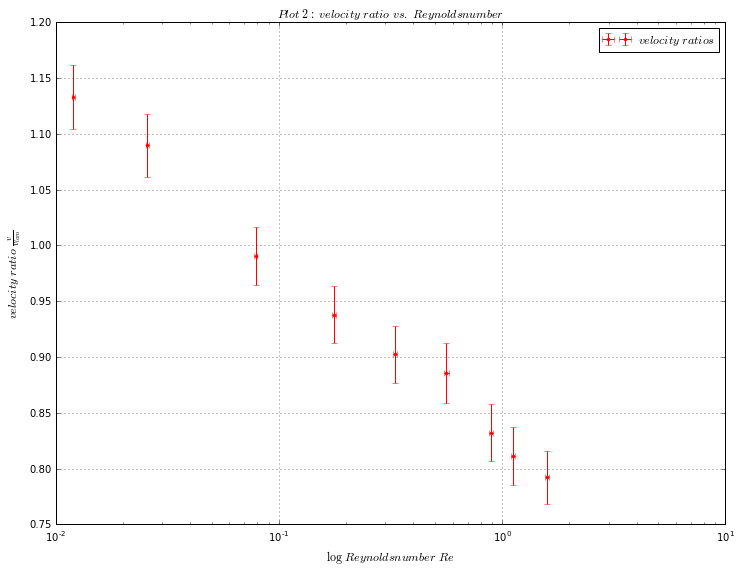

In [6]:
### v_lam
v_lam = 2/9 * 9.81e3 * (rho_k-rho_f)/eta * r**2

### Reynoldsnumber
Re = rho_f*v*2*r/eta

### plotting values
y = unp.nominal_values(v/v_lam)
y_err = unp.std_devs(v/v_lam)
x = unp.nominal_values(Re)
x_err = unp.std_devs(Re)

### plotting
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=y_err, xerr=x_err, fmt='r.', label='$velocity\ ratios$')
#ax.vlines(0.23, 0.71, 1.29, linestyles='--', label='$critical\ Reynoldsnumber:\ 0.23$')
ax.set_xscale('log')
ax.set_xlabel('$\\mathrm{log}\ Reynoldsnumber\ Re$', fontsize=12)
ax.set_ylabel('$velocity\ ratio\ \\frac{v}{v_{lam}}$', fontsize=12)
ax.set_title('$Plot\ 2:\ velocity\ ratio\ vs.\ Reynoldsnumber$', fontsize=12)
ax.grid()
ax.legend()
#plt.savefig('Plot2.pdf', dpi=400, format='pdf')
plt.show()

In [7]:
from pandas import DataFrame
DataFrame(np.array([Re,v_lam,v]).T, columns=("Re","v$_{lam}$","v"))

,Re,v$_{lam}$,v
0,1.589+/-0.034,43.0+/-1.0,34.1+/-0.6
1,1.116+/-0.026,33.2+/-0.8,26.9+/-0.6
2,0.893+/-0.020,29.0+/-0.7,24.1+/-0.5
3,0.563+/-0.013,20.4+/-0.5,18.10+/-0.34
4,0.332+/-0.006,14.19+/-0.33,12.81+/-0.19
5,0.1766+/-0.0032,9.08+/-0.21,8.52+/-0.12
6,0.0787+/-0.0013,5.11+/-0.12,5.06+/-0.06
7,0.0257+/-0.0004,2.27+/-0.05,2.475+/-0.026
8,0.01198+/-0.00018,1.360+/-0.032,1.541+/-0.016


## 2) Hagen-Poiseulle

In [8]:
g = 9.81                       # m/s**2
h_bar = unc.ufloat(502,.7)     # mm
R_k = .5 * unc.ufloat(1.5,.01) # mm
L_k = unc.ufloat(100,.5)       # mm

volumes = unp.uarray([5,10,15,20,25],0)
times = unp.uarray([136.7,271.2,409.8,553.4,697.6],5)
deltatimes = unp.uarray([times[i+1].n-times[i].n for i in range(4)],7.1)
viscosity = np.pi * rho_f*g*h_bar*R_k**4/8/L_k/(5/deltatimes)
viscosity

array([0.18879624908856163+/-0.011208885116875098,
       0.19455137638419812+/-0.011281304601668337,
       0.2015698243057059+/-0.011371907110333706,
       0.20241203805628696+/-0.011382945634266544], dtype=object)

In [9]:
DataFrame(np.array([deltatimes,viscosity]).T, columns = ("dt", "$\eta$"))

,dt,$\eta$
0,134+/-7,0.189+/-0.011
1,139+/-7,0.195+/-0.011
2,144+/-7,0.202+/-0.011
3,144+/-7,0.202+/-0.011


In [10]:
eta_bar = .25* (np.sum(viscosity)) #Pa*s
printResult("\overline\eta", eta_bar.n*1000, eta_bar.s*1000, decimal=0, unit = "mPa\cdot s")

<IPython.core.display.Math object>

In [11]:
re = 2*rho_f*5/np.pi/eta_bar/R_k*1000/np.mean(deltatimes) # *1000 for R_k in mm
printResult("\overline{dt}",np.mean(deltatimes).n,np.mean(deltatimes).s,unit = "s")
printResult("Re",re.n,re.s,decimal=3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>